In [9]:
import tensorflow as tf
from matplotlib import pyplot as plt
%matplotlib inline

In [10]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [11]:
print('number of training data: ', len(x_train))
print('number of test data: ', len(x_test))

number of training data:  60000
number of test data:  10000


In [12]:
print('shape of training data: ', x_train.shape)
print('shape of test data: ', x_test.shape)
print('shape of data: ', x_train[0].shape)

shape of training data:  (60000, 28, 28)
shape of test data:  (10000, 28, 28)
shape of data:  (28, 28)


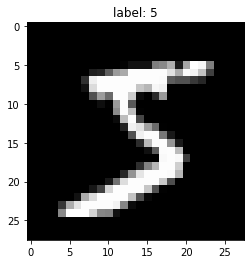

In [13]:
image = x_train[0]
label = y_train[0]

plt.imshow(image, cmap='gray')
plt.title('label: %s' % label)
plt.show()

In [16]:
cnn_model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [20]:
cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
                metrics = ['accuracy'])

In [21]:
cnn_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten_2 (Flatten)         (None, 576)              

In [22]:
x_train_4d = x_train.reshape(-1, 28,28,1)
x_test_4d = x_test.reshape(-1, 28, 28, 1)
print('shape of x_train_4d: ', x_train_4d.shape)
print('shape of x_test_4d: ', x_test_4d.shape)

shape of x_train_4d:  (60000, 28, 28, 1)
shape of x_test_4d:  (10000, 28, 28, 1)


In [23]:
cnn_model.fit(x_train_4d, y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 40s 21ms/step - loss: 0.2228 - accuracy: 0.9442
Epoch 2/5
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0678 - accuracy: 0.9792
Epoch 3/5
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0534 - accuracy: 0.9836
Epoch 4/5
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0452 - accuracy: 0.9861
Epoch 5/5
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0413 - accuracy: 0.9875


In [24]:
cnn_model.evaluate(x_test_4d, y_test, verbose=1)

313/313 [==============================] - 2s 5ms/step - loss: 0.0455 - accuracy: 0.9876


[0.04554516449570656, 0.9876000285148621]

In [25]:
eval_data = x_test[500]
eval_data_label = y_test[500]
cnn_model(eval_data.reshape(-1, 28, 28, 1))

<tf.Tensor: shape=(1, 10), dtype=float32, numpy=
array([[4.3319823e-17, 2.3597209e-15, 3.3852284e-15, 1.0000000e+00,
        3.9888814e-22, 2.5483424e-09, 1.8712421e-22, 6.0001434e-13,
        2.0545701e-14, 1.3155250e-13]], dtype=float32)>

In [26]:
print(eval_data_label)

3
